**Imports and workspace setting**

In [10]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

**Loading crime-data and preview**

In [74]:
crime_data = pd.read_csv('../data/Crime_data_2012.csv')

crime_data = crime_data.T

column_names = crime_data.iloc[0]
columns = column_names.tolist()
crime_data.columns = columns


crime_data = crime_data.iloc[1:]
crime_data = crime_data.sort_index()

crime_data.to_csv('out.csv')
crime_data = pd.read_csv('out.csv')
crime_data.rename(columns={'Unnamed: 0':'District'},inplace=True)
#crime_data.set_index("District",drop=True,inplace=True)

print("Data set size : ", crime_data.shape)

crime_data.head()

Data set size :  (25, 23)


,District,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,Rape / Incest,...,Extortion,"Cheating/Misappropriation C.B. Trust over Rs.100,000/=",Theft of Property including praedial produce over Rs. 5000/ & cycle cattle theft irrrespective of their value,Counterfeiting Currency,Offences against State,Cruelty to Children & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possession of Automatic or Repeater Shot Guns,"Offences under the Poisons, Opium & Dangerous Drugs Ord. Quantity as indicated in Circular NO. 1540/2000"
0,Ampara,29,31,36,239,69,38,16,12,37,...,2,232,242,1,0,1,2,1,0,1
1,Anuradhapura,68,47,107,834,108,72,24,15,199,...,9,270,584,6,0,23,2,4,1,7
2,Badulla (Badfulla & Bandarawela ),38,14,42,359,112,85,28,11,73,...,1,138,296,1,0,2,0,3,0,20
3,Batticaloa,21,33,38,227,56,89,11,2,52,...,4,225,221,1,0,6,3,1,1,3
4,"Colombo (Colombo South, North, Central) Mt. La...",154,22,140,2996,248,379,62,21,120,...,37,1736,2809,4,0,52,1,21,6,573


**Loading Employment by Industrical sector** 

In [84]:
emplyment_data = pd.read_csv('../data/Employees by industrial sector (% to total employment).csv')
emplyment_data = emplyment_data.sort_values(by = ['District'])
emplyment_data = emplyment_data.reset_index(drop=True)
emplyment_data.rename(columns={'Total':'Total Male Employment'}, inplace=True)
emplyment_data.rename(columns={'Total employment':'Total Female Employment'}, inplace=True)
emplyment_data.head()


,Province,District,Male emp. Agriculture,Male emp. Industry,Male emp. Services,Total Male Employment,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,Total emp. Agriculture,Total emp. Industry,Total emp. Services,Total Female Employment
0,Eastern,Ampara,13.8,19.0,26.9,59.7,1.8,4.1,44.7,50.6,11.3,15.9,30.6,57.8
1,North Central,Aqnuradhapura,3.7,6.0,27.0,36.7,1.7,5.5,18.0,25.2,2.9,5.8,23.5,32.2
2,Uva,Badulla,17.0,9.9,21.5,48.4,23.7,4.8,17.3,45.8,19.6,7.9,19.9,47.4
3,Eastern,Batticaloa,20.9,18.1,26.0,64.9,2.1,4.0,33.2,39.3,16.6,14.8,27.6,59.0
4,Western,Colombo,1.1,20.6,42.9,64.7,1.3,20.0,50.5,71.7,1.2,20.4,45.4,67.0


Data set size =  (25, 14)
Dimension =  2


Text(0.5, 1.0, 'Male-Female Employment')

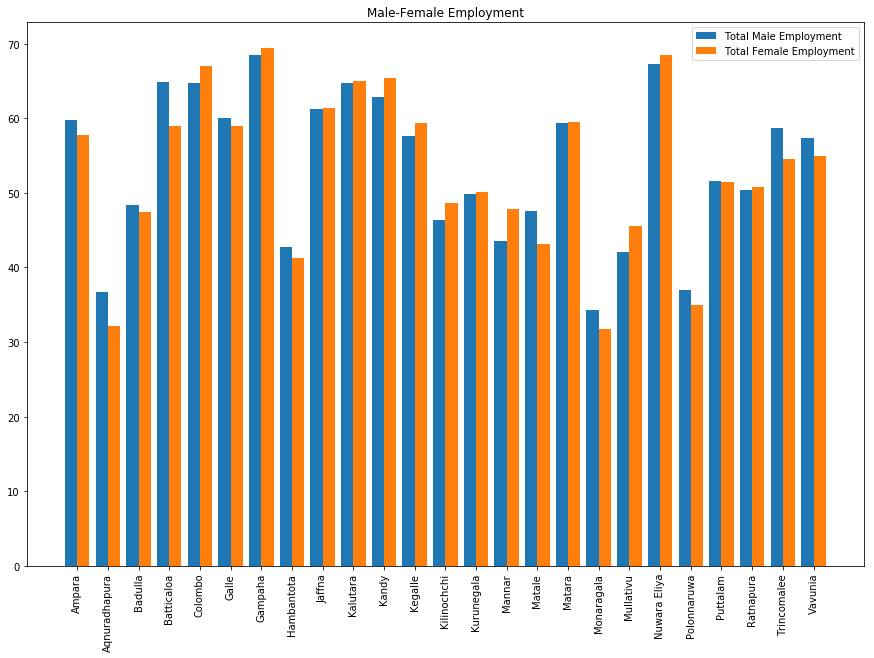

In [102]:
print('Data set size = ', emplyment_data.shape)
print('Dimension = ', emplyment_data.ndim)
#emplyment_data.iloc[:,[5,13]].plot.bar(figsize=(15, 10))

#plot data
ind = np.arange(25)    # the x locations for the groups
width = 0.4   
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(ind, emplyment_data['Total Male Employment'],width=0.4)
ax.bar(ind+width, emplyment_data['Total Female Employment'],width=0.4)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(emplyment_data.District.tolist(),rotation='vertical')
ax.legend(['Total Male Employment','Total Female Employment'])
ax.set_title('Male-Female Employment')

**Loading Accomadation for tourist data**

In [25]:
hotels_data = pd.read_csv('../data/Information for Accommodation.csv')
hotels_data.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525


In [26]:
print('Data set size = ', hotels_data.shape)
print('Dimension = ', hotels_data.ndim)

Data set size =  (2130, 10)
Dimension =  2


**Drill Down accomadation data by district**

In [27]:
## This array will become 26*10 afterwards

**Merge all 4 datasets in to one pandas frame**

In [77]:
result = pd.concat([crime_data, emplyment_data], axis=1)
result_rape_against_emp = pd.concat([crime_data.iloc[:,[9,11,12]], emplyment_data.iloc[:,2:]], axis=1)
result_rape_against_emp.head()

,Rape / Incest,Robbery,Unnatural Offence/Grve Sexual Abuse,Male emp. Agriculture,Male emp. Industry,Male emp. Services,Total Male Employment,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,Total emp. Agriculture,Total emp. Industry,Total emp. Services,Total Female Employment
0,37,66,35,13.8,19.0,26.9,59.7,1.8,4.1,44.7,50.6,11.3,15.9,30.6,57.8
1,199,242,36,3.7,6.0,27.0,36.7,1.7,5.5,18.0,25.2,2.9,5.8,23.5,32.2
2,73,128,25,17.0,9.9,21.5,48.4,23.7,4.8,17.3,45.8,19.6,7.9,19.9,47.4
3,52,89,2,20.9,18.1,26.0,64.9,2.1,4.0,33.2,39.3,16.6,14.8,27.6,59.0
4,120,1542,23,1.1,20.6,42.9,64.7,1.3,20.0,50.5,71.7,1.2,20.4,45.4,67.0


**Correlation analysis**

Index(['Rape / Incest', 'Robbery', 'Unnatural Offence/Grve Sexual Abuse',
       'Male emp. Agriculture', 'Male emp. Industry', 'Female emp. Industry',
       'Female emp. Services', 'Total emp. Agriculture',
       'Total emp. Industry'],
      dtype='object')


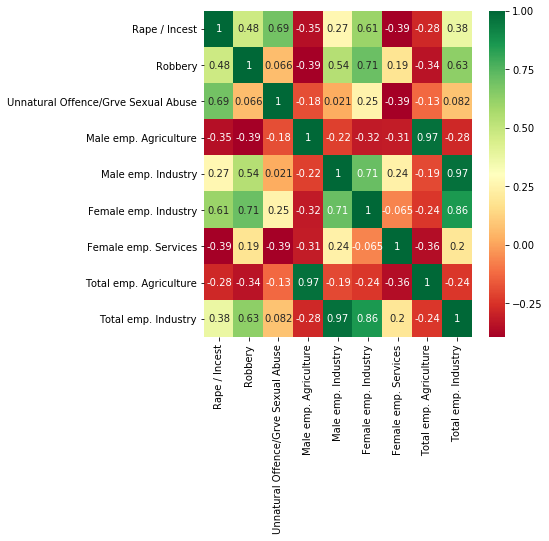

In [51]:
corrValues = result_rape_against_emp.corr(method='pearson')
topCorrFeatures = corrValues.index[abs(corrValues['Rape / Incest']) >= 0.2]
print(topCorrFeatures)

plt.figure(figsize=(6,6))
ax = sns.heatmap(result_rape_against_emp[topCorrFeatures].corr(), annot=True, cmap="RdYlGn")

**Stating independent/ dependent variables**

**Divide training and testing data-set**

In [15]:
## 20 districts for training
## 6 for training
## Or some other experimenting methods would be okay.

**Model training - possibly regression/ classification**

In [17]:
## If it is classification we need to pick a label column.

**Testing the model**